# ISOM 672: Final Project
 Team 7

# Import all necessary libraries and data 

In [122]:
import pandas as pd
import seaborn as sns
import numpy as np

#Import Dataset as received

data = pd.read_csv("online_shoppers_intention.csv")

print(data.columns)



Index(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')


# Exploratory Data Analysis

In [123]:
#First look

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [89]:
#Summarise rows/columns in dataset and datatype for each column

print(data.shape)

print()

data.info()

(12330, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool


False    10422
True      1908
Name: Revenue, dtype: int64



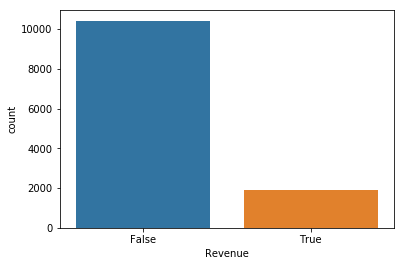

In [90]:
 #Plot target variable distribution

print(data['Revenue'].value_counts())

print()

sns.countplot(data['Revenue'])

# Add comment about need for oversampling

Random over-sampling results:
False    10422
True      4466
Name: Revenue, dtype: int64


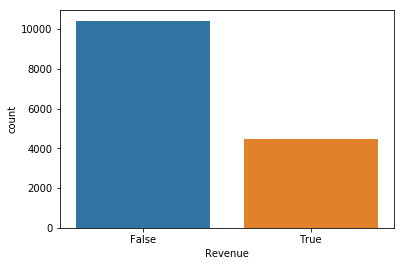

In [124]:
#Re-sampling to 70:30 ratio for class False:True

count_0, count_1 = data.Revenue.value_counts()

df_0 = data[data['Revenue'] == False]
df_1 = data[data['Revenue'] == True]

data_1_over = df_1.sample(int(count_0*3/7), replace=True, random_state=42)
data_over = pd.concat([df_0, data_1_over], axis=0)


#See updated distribution after up-sampling
print('Random over-sampling results:')
print(data_over.Revenue.value_counts())
sns.countplot(data_over['Revenue'])


## Descriptive Statistics and Missing Values

In [125]:
pd.set_option('display.max_columns',40) # to show all columns
pd.set_option('display.width',120)  #make the view smaller

print(data.describe(include='all'))

print()

print("Number of columns with missing/null values in the data: ", data.isnull().any().sum())

        Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  \
count     12330.000000             12330.000000   12330.000000            12330.000000    12330.000000   
unique             NaN                      NaN            NaN                     NaN             NaN   
top                NaN                      NaN            NaN                     NaN             NaN   
freq               NaN                      NaN            NaN                     NaN             NaN   
mean          2.315166                80.818611       0.503569               34.472398       31.731468   
std           3.321784               176.779107       1.270156              140.749294       44.475503   
min           0.000000                 0.000000       0.000000                0.000000        0.000000   
25%           0.000000                 0.000000       0.000000                0.000000        7.000000   
50%           1.000000                 7.50000

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()          

#Label all categorical variables as numbers

data_over.loc[:,"Month"] = le.fit_transform(data_over.loc[:,"Month"])
data_over.loc[:,"VisitorType"] = le.fit_transform(data_over.loc[:,"VisitorType"])
data_over.loc[:,"Weekend"] = le.fit_transform(data_over.loc[:,"Weekend"])
data_over.loc[:,"Revenue"] = le.fit_transform(data_over.loc[:,"Revenue"])

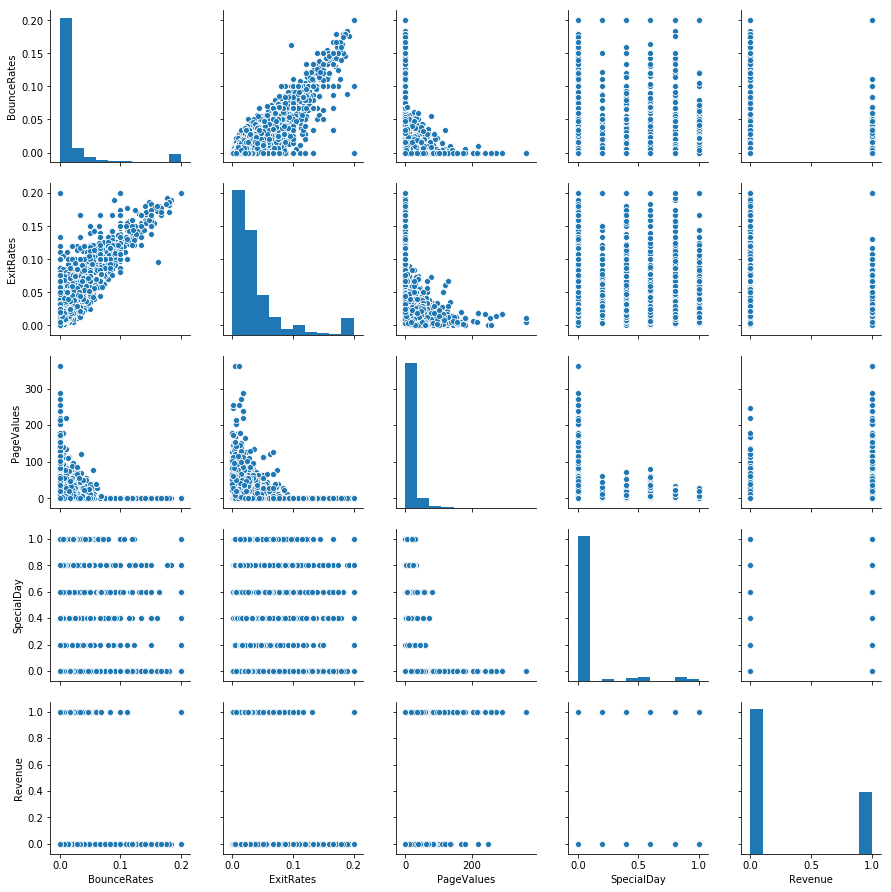

In [92]:
sns.pairplot(data_over.iloc[:,[6,7,8,9,17]])

In [127]:
data_over["Average Rate"] = (data_over.loc[:,"BounceRates"]+data_over.loc[:,"ExitRates"])/2

# Drop original variables
todrop = ['BounceRates','ExitRates']

data_over= data_over.drop(todrop,axis=1)

In [128]:
data_over.columns

Index(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue', 'Average Rate'],
      dtype='object')

In [129]:
#Select independent and dependent variables in two seperate dataframes; Leave out leakage variables such as duration and page views, and include average rate
#Bounce rate and exit rate are removed 

X=data_over.loc[:,['PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend','Average Rate']]
y=data_over.loc[:,'Revenue']

print("The features after removing leakage variables are:")

print()

print(X.columns)



The features after removing leakage variables are:

Index(['PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Average Rate'],
      dtype='object')


In [130]:
#Change categorical variables to dummy variables

X = pd.get_dummies(data=X, columns=['Month','VisitorType','OperatingSystems', 'Browser', 'Region', 'TrafficType'], drop_first=True)


## Number of transactions by month

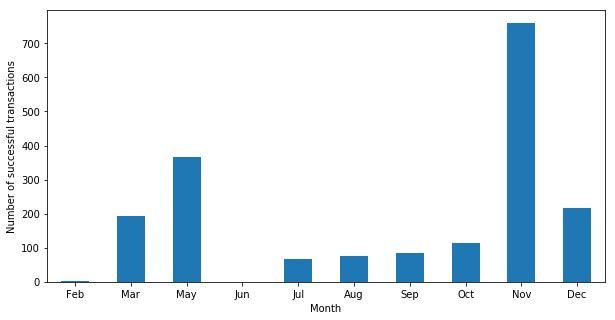

In [131]:
#Rearrange Month Indexes as per calender order
import matplotlib.pyplot as plt


data['Month'] = pd.Categorical(data['Month'],["Feb", "Mar", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

# Plot Revenue by Month

monthly_revenue = data.groupby(['Month'])[['Revenue']].agg('sum')
graph = monthly_revenue.plot(kind='bar', figsize=(10,5),legend=None)
plt.xticks(rotation=0)
graph.set_xlabel('Month')
graph.set_ylabel('Number of successful transactions')
plt.show()

In [132]:

############################## Python version compatibility ##############################

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


import itertools

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt
from sklearn import preprocessing



import warnings
warnings.filterwarnings('ignore')

np.random.seed(42) # Ensure reproducability

#Splitting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print (len(X_train))
print (len(X_test))


10421
4467


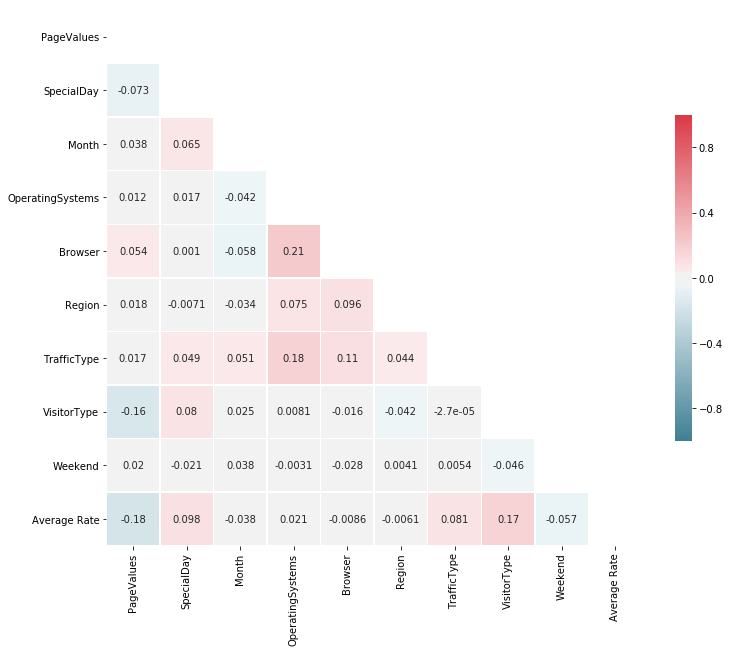

In [133]:
#Correlation heatmap

corr = data_over.loc[:,['PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend','Average Rate']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)



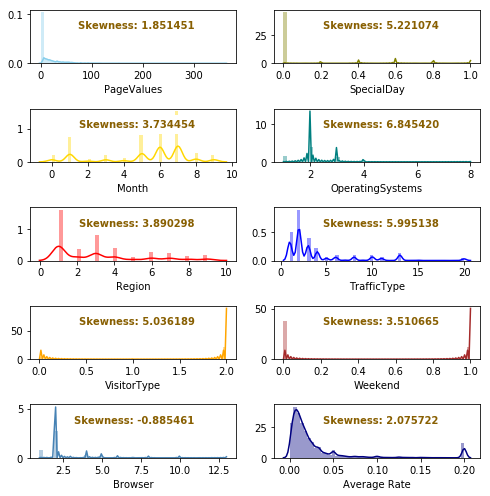

In [134]:
############################################ Data Visualization (Skewness) ############################################

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data_over.loc[:,"Month"] = le.fit_transform(data_over.loc[:,"Month"])

f, axes = plt.subplots(5, 2, figsize=(7, 7))

sns.distplot(data_over.iloc[:,6], color="skyblue", ax=axes[0,0])
sns.distplot(data_over.iloc[:,7], color="olive", ax=axes[0,1])
sns.distplot(data_over.iloc[:,8], color="gold", ax=axes[1,0])
sns.distplot(data_over.iloc[:,9], color="teal", ax=axes[1,1])
sns.distplot(data_over.iloc[:,10], color="steelblue", ax=axes[4,0])
sns.distplot(data_over.iloc[:,11], color="red", ax=axes[2,0])
sns.distplot(data_over.iloc[:,12], color="blue", ax=axes[2,1])
sns.distplot(data_over.iloc[:,13], color="orange", ax=axes[3,0])
sns.distplot(data_over.iloc[:,14], color="brown", ax=axes[3,1])
sns.distplot(data_over.iloc[:,16], color="navy", ax=axes[4,1])

for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.8, y=0.8, transform=ax.transAxes, s="Skewness: %f" % data_over.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.tight_layout()



In [176]:
########################### Set random seed to 42 and perform grid-search on Decision Tree #################################

from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

np.random.seed(42) # Ensure reproducability

################################# Nested Cross-Validation #################################

##################################### Parameter Tuning ####################################

# Exhaustive search over specified parameter values for an estimator.
# GridSearchCV implements a “fit” and a “score” method. 
# It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” 
# if they are implemented in the estimator used.

# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)
    
#Normalize Data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
    
############################## Decision Tree Parameter Tuning ##############################
# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt_f1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7,8,9, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5,6,7],
                              }],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)


gs_dt_f1 = gs_dt_f1.fit(X_train,y_train)
print("\n Parameter Tuning for Decision Tree")
print("Non-nested CV f1-score: ", gs_dt_f1.best_score_)
print("Optimal Parameter: ", gs_dt_f1.best_params_)
print("Optimal Estimator: ", gs_dt_f1.best_estimator_)
nested_score_gs_dt_f1 = cross_val_score(gs_dt_f1, X=X, y=y, cv=outer_cv)
print("Nested CV f1-score: ",nested_score_gs_dt_f1.mean(), " +/- ", 
      nested_score_gs_dt_f1.std())



############################ Logistic Regression Parameter Tuning ############################
# Choosing C parameter for Logistic Regression AND type of penalty (ie., l1 vs l2)
gs_lr_f1 = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='f1',
                  cv=inner_cv, n_jobs=5)

gs_lr_f1 = gs_lr_f1.fit(X_train,y_train)
print("\n Parameter Tuning for Logistic Regression")
print("Non-nested CV f1-score: ", gs_lr_f1.best_score_)
print("Optimal Parameter: ", gs_lr_f1.best_params_)
print("Optimal Estimator: ", gs_lr_f1.best_estimator_)
nested_score_gs_lr_f1 = cross_val_score(gs_lr_f1, X=X, y=y, cv=outer_cv)
print("Nested CV f1-score:",nested_score_gs_lr_f1.mean(), " +/- ",
      nested_score_gs_lr_f1.std())
 
################################### kNN Parameter Tuning ###################################



# Choosing k for kNN AND type of distance
gs_knn_f1 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19],
                               'weights':['uniform','distance']}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)

gs_knn_f1 = gs_knn_f1.fit(X_train,y_train)  
print("\n Parameter Tuning for KNN")
print("Non-nested CV f1-score: ", gs_knn_f1.best_score_)
print("Optimal Parameter: ", gs_knn_f1.best_params_)
print("Optimal Estimator: ", gs_knn_f1.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn_f1 = cross_val_score(gs_knn_f1, X=X, y=y, cv=outer_cv)
print("Nested CV f1-score: ",nested_score_gs_knn_f1.mean(), " +/- ", nested_score_gs_knn_f1.std())
 


 Parameter Tuning for Decision Tree
Non-nested CV f1-score:  0.8581677867682843
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Nested CV f1-score:  0.8873966752904152  +/-  0.012343519964054295

 Parameter Tuning for Logistic Regression
Non-nested CV f1-score:  0.7738880379240474
Optimal Parameter:  {'C': 0.0001, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='warn', tol=0.0001, 

## Plotting confusion matrix

Nested score for DecisionTree is:  0.9068726214461608




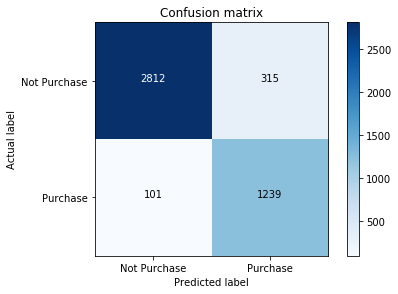

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3127
           1       0.80      0.92      0.86      1340

   micro avg       0.91      0.91      0.91      4467
   macro avg       0.88      0.91      0.89      4467
weighted avg       0.91      0.91      0.91      4467

Nested score for LogisticRegression is:  0.8623237071860309




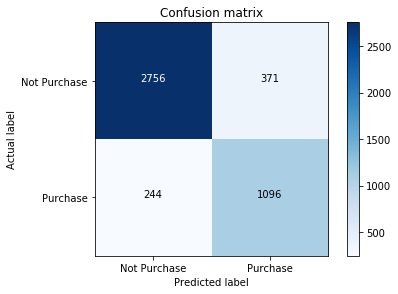

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3127
           1       0.75      0.82      0.78      1340

   micro avg       0.86      0.86      0.86      4467
   macro avg       0.83      0.85      0.84      4467
weighted avg       0.87      0.86      0.86      4467

Nested score for KNN is:  0.9044101186478621




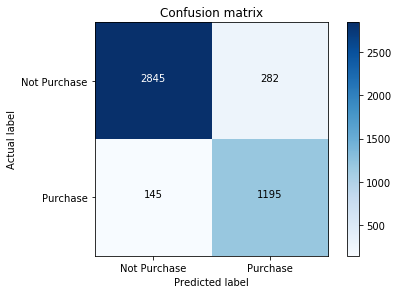

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3127
           1       0.81      0.89      0.85      1340

   micro avg       0.90      0.90      0.90      4467
   macro avg       0.88      0.90      0.89      4467
weighted avg       0.91      0.90      0.91      4467



In [177]:
# Run models on test set based on chosen best models using f1 score and plot classification report and confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("")
    else:
        print('')

    print("")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')



#Best models based on f1 score

dt = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
dt = dt.fit(X_train,y_train)  


lr =  LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

lr = lr.fit(X_train,y_train)  


knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='distance')
knn = knn.fit(X_train_std,y_train)  

models = [dt,lr,knn]
y_pred_dt = dt.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test_std)


y_preds = [y_pred_dt,y_pred_lr, y_pred_knn]
labels = ["DecisionTree","LogisticRegression","KNN"]

x = 0
for x in [0,1]:
    y_preds[x]=  models[x].predict(X_test)
    print( "Nested score for",labels[x],"is: ", accuracy_score(y_test,y_preds[x]))
    plot_confusion_matrix(confusion_matrix(y_test,y_preds[x]), classes=['Not Purchase','Purchase'])
    plt.show()
    print(classification_report(y_test,y_preds[x]))

y_preds[2]=  models[2].predict(X_test_std)
print( "Nested score for",labels[2],"is: ", accuracy_score(y_test,y_preds[2]))
plot_confusion_matrix(confusion_matrix(y_test,y_preds[2]), classes=['Not Purchase','Purchase'])
plt.show()
print(classification_report(y_test,y_preds[2]))

## Transformations

In [154]:
# Make new dataframe to add transformated columns so original dataframe is not disrupted

data_over_transformed = data_over.copy()

data_over_transformed.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Average Rate
0,0,0.0,0,0.0,1,0.000000,0.0,0.0,2,1,1,1,1,2,0,0,0.200
1,0,0.0,0,0.0,2,64.000000,0.0,0.0,2,2,2,1,2,2,0,0,0.050
2,0,0.0,0,0.0,1,0.000000,0.0,0.0,2,4,1,9,3,2,0,0,0.200
3,0,0.0,0,0.0,2,2.666667,0.0,0.0,2,3,2,2,4,2,0,0,0.095
4,0,0.0,0,0.0,10,627.500000,0.0,0.0,2,3,3,1,4,2,1,0,0.035


In [155]:
sqrt = ['PageValues','Average Rate','SpecialDay']

In [301]:
#for i in log:
 #   data_over_transformed.loc[:,i]=(data_over_transformed.loc[:,i]+1/3)

In [156]:
for i in sqrt:
    colname=str(i)+'_sqrt'
    data_over_transformed[colname] = np.sqrt(data_over_transformed[i])

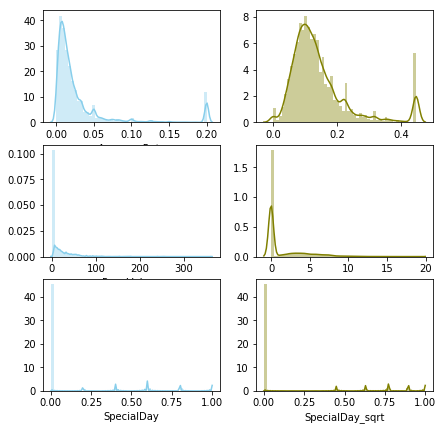

In [157]:
#Check if the columns are added and compare original and new distributions

data_over_transformed.columns

f, axes = plt.subplots(3, 2, figsize=(7, 7))

sns.distplot(data_over_transformed.loc[:,'Average Rate'], color="skyblue", ax=axes[0,0])
sns.distplot(data_over_transformed.loc[:,'Average Rate_sqrt'], color="olive", ax=axes[0,1])

sns.distplot(data_over_transformed.loc[:,'PageValues'], color="skyblue", ax=axes[1,0])
sns.distplot(data_over_transformed.loc[:,'PageValues_sqrt'], color="olive", ax=axes[1,1])

sns.distplot(data_over_transformed.loc[:,'SpecialDay'], color="skyblue", ax=axes[2,0])
sns.distplot(data_over_transformed.loc[:,'SpecialDay_sqrt'], color="olive", ax=axes[2,1])



In [158]:
# Drop original variables

data_over_transformed= data_over_transformed.drop(sqrt,axis=1)

In [159]:
data_over_transformed.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,PageValues_sqrt,Average Rate_sqrt,SpecialDay_sqrt
0,0,0.0,0,0.0,1,0.000000,2,1,1,1,1,2,0,0,0.0,0.447214,0.0
1,0,0.0,0,0.0,2,64.000000,2,2,2,1,2,2,0,0,0.0,0.223607,0.0
2,0,0.0,0,0.0,1,0.000000,2,4,1,9,3,2,0,0,0.0,0.447214,0.0
3,0,0.0,0,0.0,2,2.666667,2,3,2,2,4,2,0,0,0.0,0.308221,0.0
4,0,0.0,0,0.0,10,627.500000,2,3,3,1,4,2,1,0,0.0,0.187083,0.0


In [160]:
print(data_over_transformed.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'PageValues_sqrt', 'Average Rate_sqrt', 'SpecialDay_sqrt'],
      dtype='object')


In [162]:
X_transformed=data_over_transformed.loc[:,['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'PageValues_sqrt', 'Average Rate_sqrt', 'SpecialDay_sqrt']]

In [163]:
# These are encoded as numbers  - let's change categorical ones to dummy variables

X_transformed = pd.get_dummies(data=X_transformed, columns=['Month','VisitorType','OperatingSystems', 'Browser', 'Region', 'TrafficType'], drop_first=True)

In [165]:
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_transformed, y, test_size=0.30, random_state=42,stratify=y)
print (len(X_t_train))
print (len(X_t_test))
sc.fit(X_t_train)
X_train_std = sc.transform(X_t_train)
X_test_std = sc.transform(X_t_test)

10421
4467


In [38]:
############################## Decision Tree Parameter Tuning for f1 score ##############################

# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7,8,9, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5,6,7],
                              }],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)


gs_dt = gs_dt.fit(X_t_train,y_t_train)
print("\n Parameter Tuning for Decision Tree")
print("Non-nested CV f1-score: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X_transformed, y=y_transformed, cv=outer_cv)
print("Nested CV f1-score: ",nested_score_gs_dt.mean(), " +/- ", 
      nested_score_gs_dt.std())


############################ Logistic Regression Parameter Tuning ############################
# Choosing C parameter for Logistic Regression AND type of penalty (ie., l1 vs l2)
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='f1',
                  cv=inner_cv)

gs_lr = gs_lr.fit(X_t_train,y_t_train)
print("\n Parameter Tuning for Logistic Regression")
print("Non-nested CV f1-score: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X_transformed, y=y_transformed, cv=outer_cv)
print("Nested CV f1-score:",nested_score_gs_lr.mean(), " +/- ",
      nested_score_gs_lr.std())
 
################################### kNN Parameter Tuning ###################################

#Normalize Data
sc = StandardScaler()
sc.fit(X_t_train)
X_train_std = sc.transform(X_t_train)
X_test_std = sc.transform(X_t_test)

# Choosing k for kNN AND type of distance
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19],
                               'weights':['uniform','distance']}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)

gs_knn = gs_knn.fit(X_t_train,y_t_train)  
print("\n Parameter Tuning for KNN")
print("Non-nested CV f1-score: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn = cross_val_score(gs_knn, X=X_transformed, y=y_transformed, cv=outer_cv)
print("Nested CV f1-score: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())
 


 Parameter Tuning for Decision Tree
Non-nested CV f1-score:  0.8581168036797243
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Nested CV f1-score:  0.8904114989117943  +/-  0.008568859361829384

 Parameter Tuning for Logistic Regression
Non-nested CV f1-score:  0.763688862278417
Optimal Parameter:  {'C': 1e-05, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, ver

Nested score for DecisionTree is:  0.9053055742108798




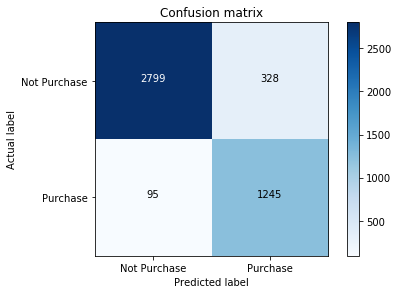

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3127
           1       0.79      0.93      0.85      1340

   micro avg       0.91      0.91      0.91      4467
   macro avg       0.88      0.91      0.89      4467
weighted avg       0.91      0.91      0.91      4467

Nested score for LogisticRegression is:  0.8609805238415044




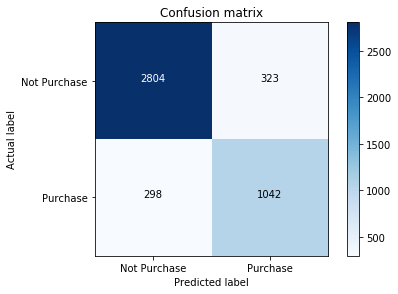

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3127
           1       0.76      0.78      0.77      1340

   micro avg       0.86      0.86      0.86      4467
   macro avg       0.83      0.84      0.84      4467
weighted avg       0.86      0.86      0.86      4467

Nested score for KNN is:  0.9120214909335125




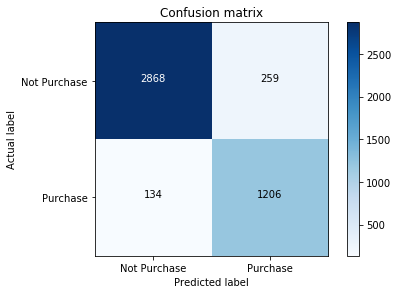

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3127
           1       0.82      0.90      0.86      1340

   micro avg       0.91      0.91      0.91      4467
   macro avg       0.89      0.91      0.90      4467
weighted avg       0.92      0.91      0.91      4467



In [175]:
# Run models on test set based on chosen best models using f1 score and plot classification report and confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("")
    else:
        print('')

    print("")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


#Best models based on f1 score

dt = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
dt = dt.fit(X_t_train,y_t_train)  


lr =  LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

lr = lr.fit(X_t_train,y_t_train)  


knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='distance')
knn = knn.fit(X_train_std,y_t_train)  

models = [dt,lr,knn]
y_pred_dt = dt.predict(X_t_test)
y_pred_lr = lr.predict(X_t_test)
y_pred_knn = knn.predict(X_test_std)


y_preds = [y_pred_dt,y_pred_lr, y_pred_knn]

x = 0

y_preds[0]=  models[0].predict(X_t_test)
print( "Nested score for",labels[0],"is: ", accuracy_score(y_t_test,y_preds[0]))
plot_confusion_matrix(confusion_matrix(y_t_test,y_preds[0]), classes=['Not Purchase','Purchase'])
plt.show()
print(classification_report(y_t_test,y_preds[0]))

y_preds[1]=  models[1].predict(X_t_test)
print( "Nested score for",labels[1],"is: ", accuracy_score(y_t_test,y_preds[1]))
plot_confusion_matrix(confusion_matrix(y_t_test,y_preds[1]), classes=['Not Purchase','Purchase'])
plt.show()
print(classification_report(y_t_test,y_preds[1]))

y_preds[2]=  models[2].predict(X_test_std)
print( "Nested score for",labels[2],"is: ", accuracy_score(y_t_test,y_preds[2]))
plot_confusion_matrix(confusion_matrix(y_t_test,y_preds[2]), classes=['Not Purchase','Purchase'])
plt.show()
print(classification_report(y_t_test,y_preds[2]))

# Learning Curve

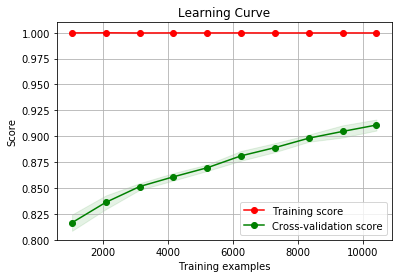

In [167]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10), scorer = None, ylab="Score"):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

#Logistic Regression - out sample
title = "Learning Curve"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
plot_learning_curve(estimator, title, X_transformed, y, (0.8,1.01), cv=cv, n_jobs=4, scorer='f1_macro', ylab="F1 Score")

plt.show()

# Fitting Graph

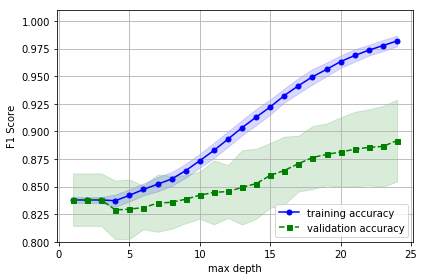

In [168]:
from sklearn.model_selection import validation_curve

param_range = list(range(1,25,1))

train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'), #Build Logistic Regression Models
                X=X_transformed, 
                y=y, 
                param_name="max_depth", # parameter C: Inverse of regularization strength; must be a positive float. Smaller values of paramter C specify stronger regularization.
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="f1_macro", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('max depth')
plt.ylabel('F1 Score')
plt.ylim([0.8, 1.01]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure


In [ ]:
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ROC Curve

Accuracy: 0.91 (+/- 0.07)
[0.95436242 0.94161074 0.94627267 0.93015447 0.92411014 0.86702485
 0.88978495 0.86424731 0.87163978 0.8608871 ]
F1-score: 0.89 (+/- 0.07)
[0.94672987 0.93274426 0.93789079 0.92049534 0.91437813 0.85523075
 0.87779997 0.85285703 0.85976498 0.84999291]
10-fold cross validation:

ROC AUC: 0.92 (+/- 0.03) [Decision tree]
ROC AUC: 0.87 (+/- 0.02) [Logistic regression]
ROC AUC: 0.98 (+/- 0.01) [kNN]


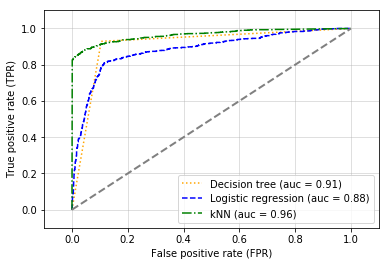

In [172]:
############################ Performance w/ Cross Validation ############################
scores=cross_val_score(knn, X=X_transformed, y=y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores) # print accuracy for each iteration of cross-validation

scores_f1=cross_val_score(knn, X=X_transformed, y=y, cv=10, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))# returns an array of scores of the estimator for each run of the cross validation.
print(scores_f1) # print f1-score for each iteration of cross-validation

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

clf1 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

clf2 = LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

clf3 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='distance')

clf_labels = ['Decision tree','Logistic regression', 'kNN']
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
    
for clf, label in zip([clf1, clf2, clf3], clf_labels): 
    if clf in (clf1, clf2, clf3):
        scores = cross_val_score(estimator=clf,  
                                 X=X_transformed,
                                 y=y,
                                 cv=10,
                                 scoring='roc_auc')
    elif clf is clf3:
        scores = cross_val_score(estimator=clf,  
                                 X=X_train_std,
                                 y=y,
                                 cv=10,
                                 scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      
linestyles = [':', '--', '-.', '-']        
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):
    if clf in (clf1,clf2):
    # Assuming the label of the positive class is 1 and data is normalized
        y_pred = clf.fit(X_t_train,
                     y_t_train).predict_proba(X_t_test)[:, 1] # Make predictions based on the classifiers
        fpr, tpr, thresholds = roc_curve(y_true=y_t_test, # Build ROC curve
                                     y_score=y_pred)
    elif clf is clf3:
        y_pred = clf.fit(X_train_std,
                     y_t_train).predict_proba(X_test_std)[:, 1] # Make predictions based on the classifiers
        fpr, tpr, thresholds = roc_curve(y_true=y_t_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)   
        # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()